In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.shape

(3755, 11)

In [8]:
df = df.dropna(how='any')

In [12]:
df.drop(['salary','salary_currency'],axis=1,inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [13]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.2+ KB


In [18]:
df.rename(columns={'salary_in_usd':'Salary($)'},inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,Salary($),employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [94]:
df_jobtitle=df.groupby('job_title')
# df_jobtitlesorted=df_jobtitle.sort_values('Salary($)')
df_jobtitle

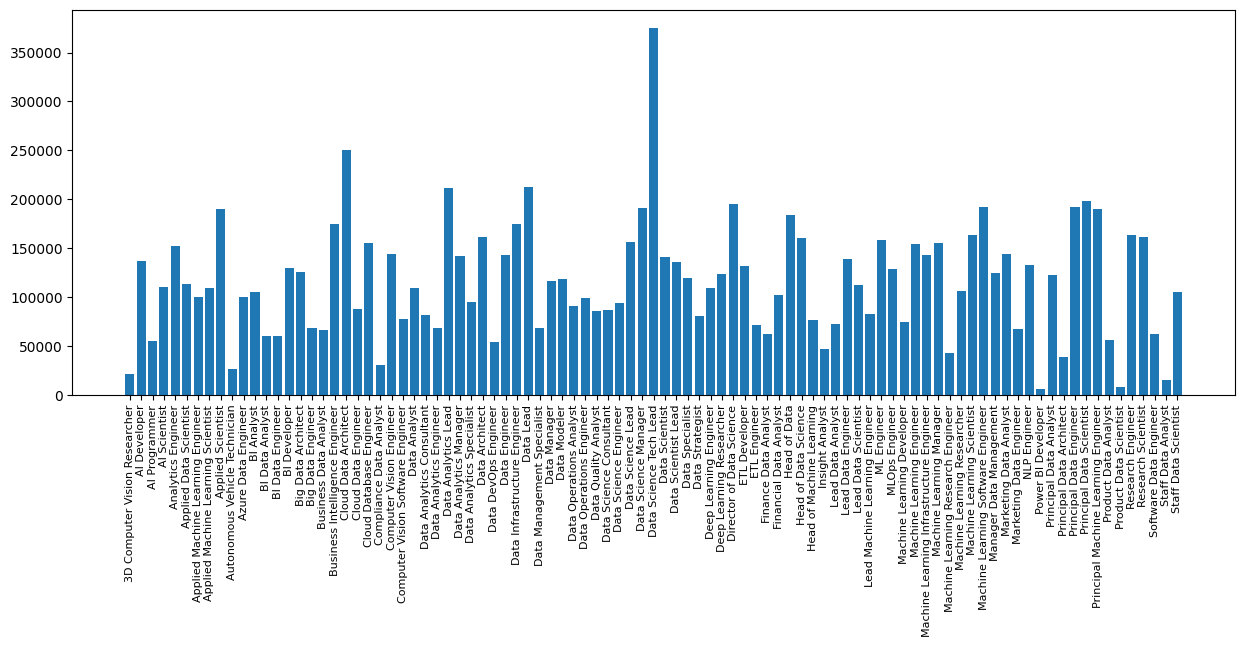

In [99]:
salaries=df_jobtitle['Salary($)'].mean()
# print(salaries)
# salaries=sorted(salaries)
df_jobtitles=[jobtitle for jobtitle,df1 in df_jobtitle]
# print(df_jobtitles)
plt.figure(figsize=(15,5),dpi=100)
plt.bar(df_jobtitles,salaries)
plt.xticks(df_jobtitles,rotation='vertical',size=8)

# plt.figure(figsize=(8, 5))
# y_pos = [i * 5 for i in range(len(df_jobtitles))] 
# fig, ax = plt.subplots()
# ax.barh(y_pos, salaries, align='center')
# ax.set_yticks(y_pos, labels=df_jobtitles)
# plt.xlim(0, 5)
# plt.ylim(0, 100)
plt.show()

In [100]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
Salary($)             0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [102]:
df.duplicated().sum()

1171

In [103]:
df.drop_duplicates(inplace=True)

In [104]:
df.duplicated().sum()

0

In [105]:
df.corr(numeric_only=True)

,work_year,Salary($),remote_ratio
work_year,1.000000,0.236958,-0.219160
Salary($),0.236958,1.000000,-0.084502
remote_ratio,-0.219160,-0.084502,1.000000


In [109]:
count=df['work_year'].value_counts()
count

work_year
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_55100\111403422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index,y=count.values,palette='flare')


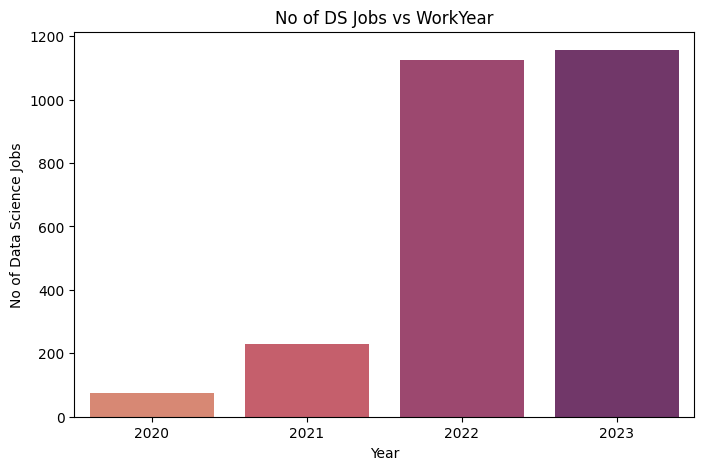

In [125]:
plt.figure(figsize=(8,5))
sns.barplot(x=count.index,y=count.values,palette='flare')
plt.xlabel("Year")
plt.ylabel("No of Data Science Jobs")
plt.title("No of DS Jobs vs WorkYear")
plt.show()

### Data Science Jobs increased greatly from 2021 to 2022

In [119]:
df.head()

,work_year,experience_level,employment_type,job_title,Salary($),employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [124]:
exp = df['experience_level'].value_counts()

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_55100\433976398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exp.index,y=exp.values,palette='viridis')


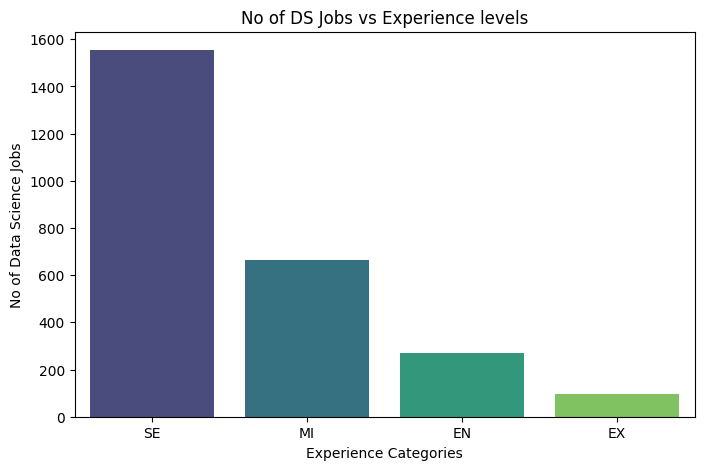

In [126]:
plt.figure(figsize=(8,5))
sns.barplot(x=exp.index,y=exp.values,palette='viridis')
plt.xlabel("Experience Categories")
plt.ylabel("No of Data Science Jobs")
plt.title("No of DS Jobs vs Experience levels")
plt.show()

### Most people are very experienced.

In [129]:
count=df['employment_type'].value_counts()

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_55100\2573172153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index,y=count.values,palette='vlag')


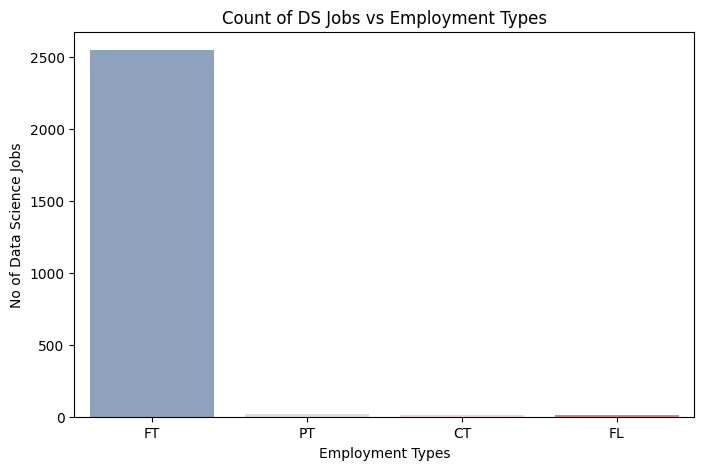

In [130]:
plt.figure(figsize=(8,5))
sns.barplot(x=count.index,y=count.values,palette='vlag')
plt.xlabel("Employment Types")
plt.ylabel("No of Data Science Jobs")
plt.title("Count of DS Jobs vs Employment Types")
plt.show()

### Most people are full time employees.

In [134]:
jobs=df['job_title'].value_counts().head(10)

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_55100\2892828890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jobs.index,y=jobs.values,palette='coolwarm')


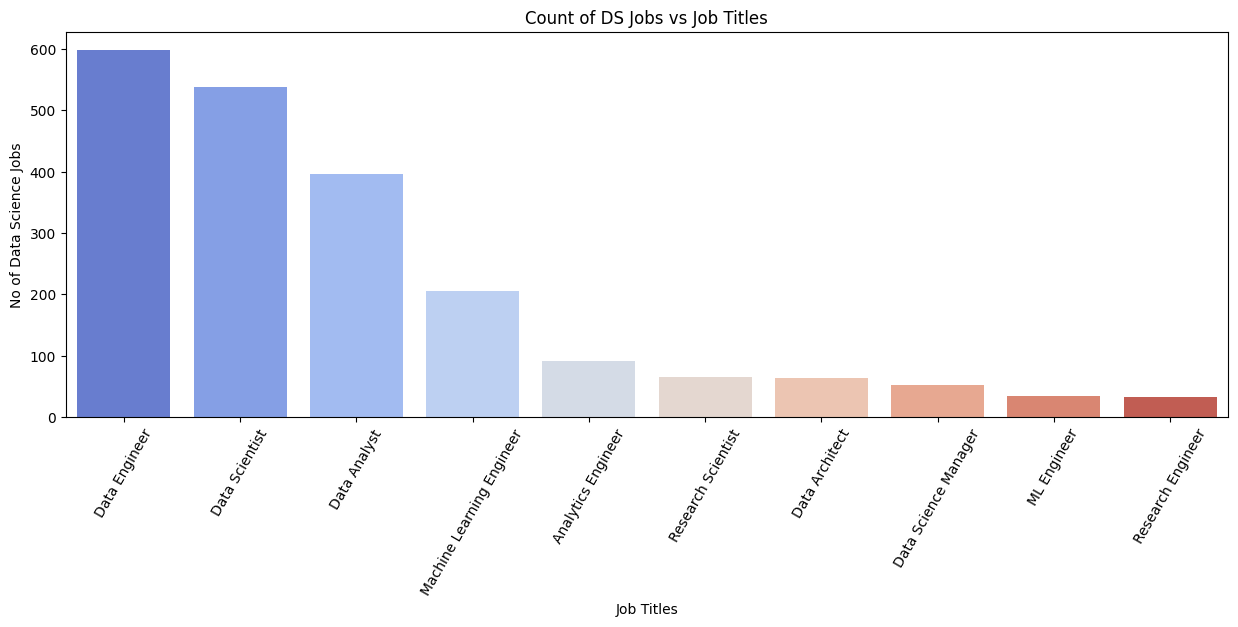

In [158]:
plt.figure(figsize=(15,5))
sns.barplot(x=jobs.index,y=jobs.values,palette='coolwarm')
plt.xlabel("Job Titles")
plt.ylabel("No of Data Science Jobs")
plt.title("Count of DS Jobs vs Job Titles")
plt.xticks(rotation=60)
plt.show()

In [139]:
rr=df['remote_ratio'].value_counts()

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_55100\500624898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rr.index,y=rr.values,palette='rocket')


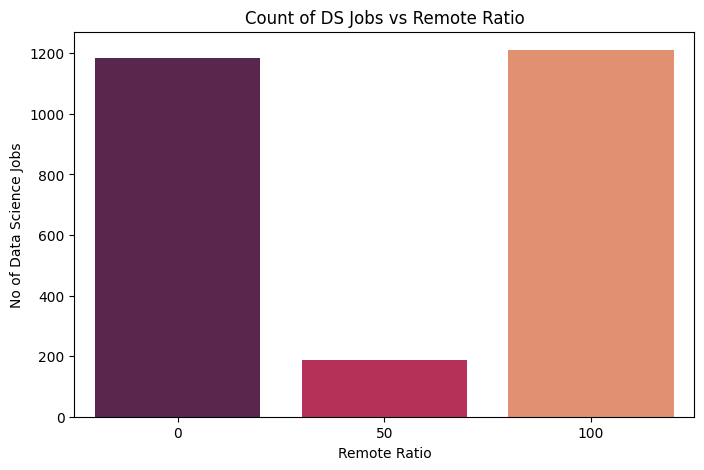

In [142]:
plt.figure(figsize=(8,5))
sns.barplot(x=rr.index,y=rr.values,palette='rocket')
plt.xlabel("Remote Ratio")
plt.ylabel("No of Data Science Jobs")
plt.title("Count of DS Jobs vs Remote Ratio")
plt.show()

### Most people are either fully remote or not remote at all.

In [146]:
cl=df['company_location'].value_counts().head(10)
cl

company_location
US    1929
GB     155
CA      83
IN      57
DE      55
ES      44
FR      33
BR      15
AU      14
PT      14
Name: count, dtype: int64

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_55100\462923659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cl.index,y=cl.values,palette='mako')


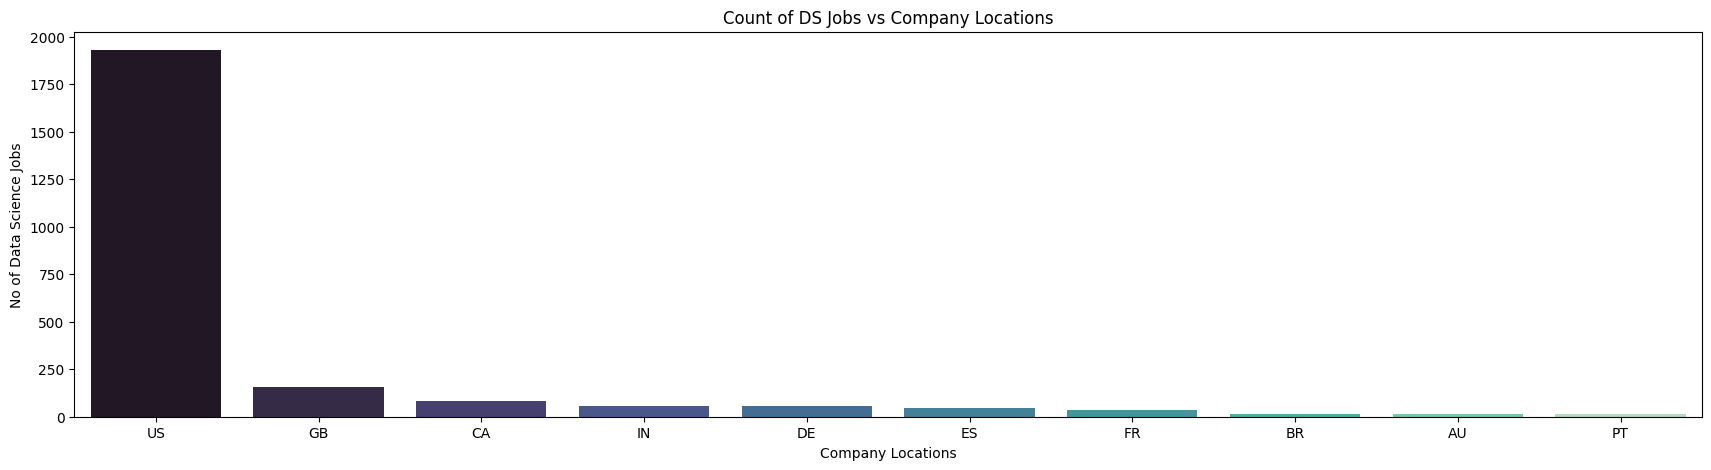

In [147]:
plt.figure(figsize=(21,5))
sns.barplot(x=cl.index,y=cl.values,palette='mako')
plt.xlabel("Company Locations")
plt.ylabel("No of Data Science Jobs")
plt.title("Count of DS Jobs vs Company Locations")
plt.show()

### Most companies are located in the US

In [151]:
er=df['employee_residence'].value_counts().head(10)

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_55100\176156796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=er.index,y=er.values,palette='mako')


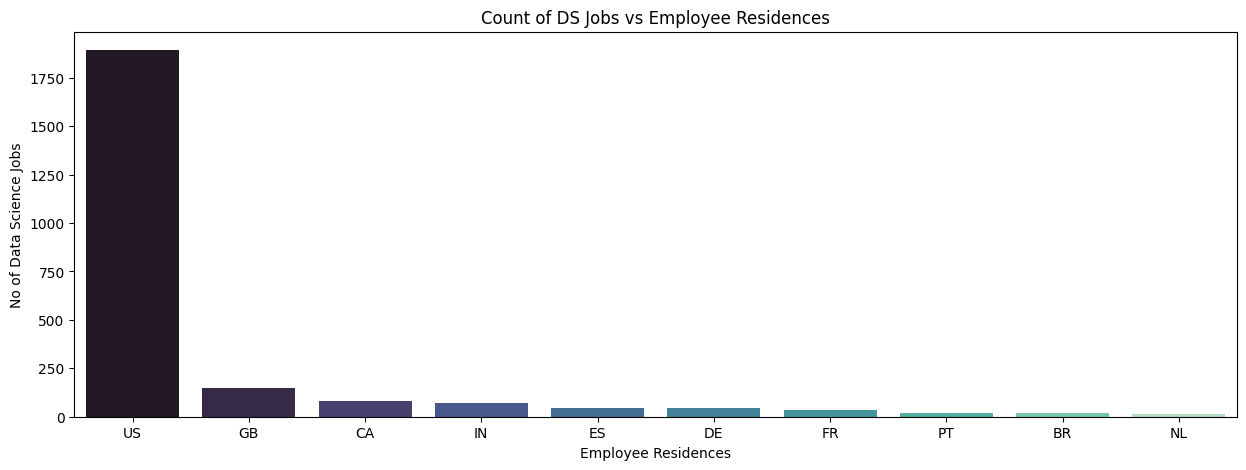

In [152]:
plt.figure(figsize=(15,5))
sns.barplot(x=er.index,y=er.values,palette='mako')
plt.xlabel("Employee Residences")
plt.ylabel("No of Data Science Jobs")
plt.title("Count of DS Jobs vs Employee Residences")
plt.show()

In [153]:
df.head()

,work_year,experience_level,employment_type,job_title,Salary($),employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [156]:
cs=df['company_size'].value_counts()

C:\Users\Riddhith Banerjee\AppData\Local\Temp\ipykernel_55100\2474223445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cs.index,y=cs.values,palette='crest')


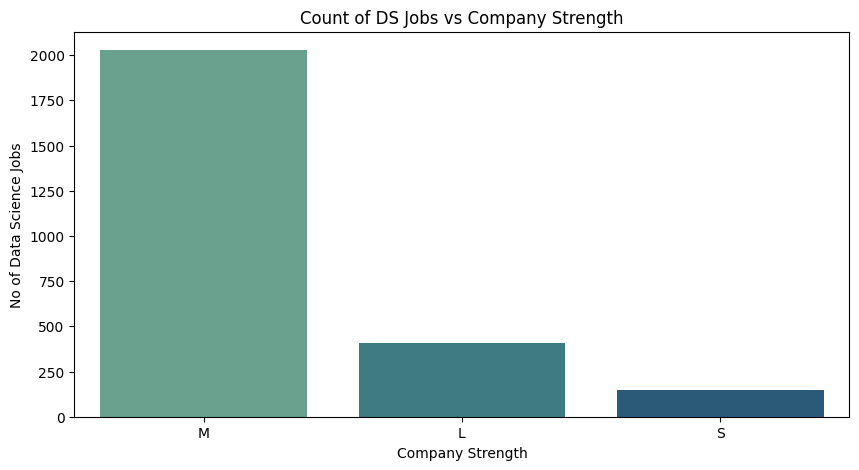

In [157]:
plt.figure(figsize=(10,5))
sns.barplot(x=cs.index,y=cs.values,palette='crest')
plt.xlabel("Company Strength")
plt.ylabel("No of Data Science Jobs")
plt.title("Count of DS Jobs vs Company Strength")
plt.show()

### Most employees are from medium sized companies.

<Axes: >

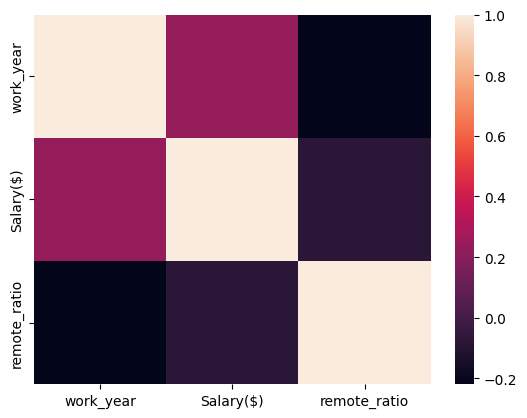

In [160]:
sns.heatmap(df.corr(numeric_only=True))

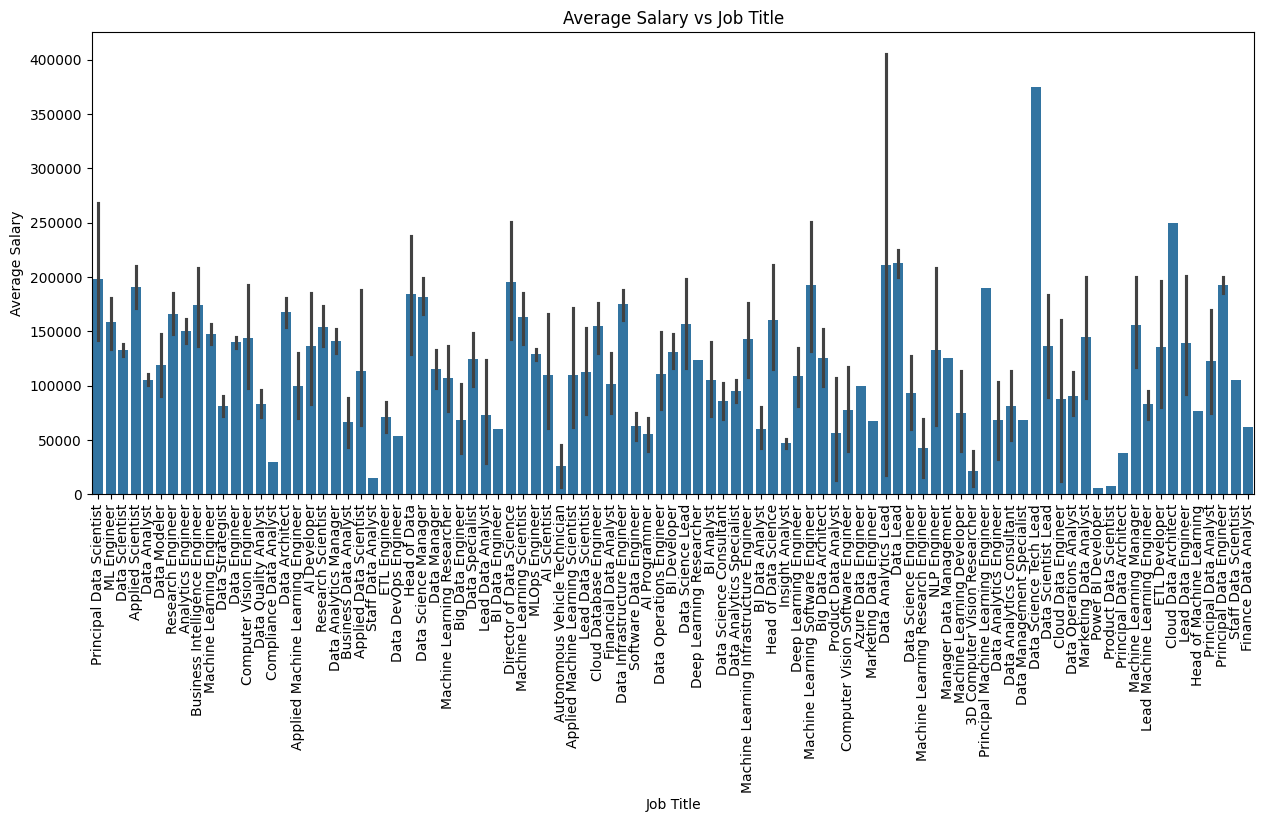

In [166]:
# plt.figure(figsize=(15,6))
# sns.barplot(x='job-title',y='Salary($)',data=df,palette='crest')
# plt.xlabel("Job Titles")
# plt.ylabel("Average Salary")
# plt.title("Average Salary vs Job Titles")
# plt.show()
plt.figure(figsize=(15,6))
sns.barplot(x='job_title', y='Salary($)', data=df)
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.title('Average Salary vs Job Title')
plt.show()

In [168]:
df.groupby(['job_title'])['Salary($)'].mean().head(20)

job_title
3D Computer Vision Researcher          21352.250000
AI Developer                          136666.090909
AI Programmer                          55000.000000
AI Scientist                          110120.875000
Analytics Engineer                    150151.747253
Applied Data Scientist                113726.300000
Applied Machine Learning Engineer      99875.500000
Applied Machine Learning Scientist    109452.833333
Applied Scientist                     190342.580645
Autonomous Vehicle Technician          26277.500000
Azure Data Engineer                   100000.000000
BI Analyst                            104888.888889
BI Data Analyst                        60440.133333
BI Data Engineer                       60000.000000
BI Developer                          130727.272727
Big Data Architect                    125802.500000
Big Data Engineer                      68672.000000
Business Data Analyst                  66065.400000
Business Intelligence Engineer        174150.000000
Cl

In [169]:
df.groupby(['remote_ratio'])['company_size'].value_counts()

remote_ratio  company_size
0             M               1067
              L                 95
              S                 24
50            L                108
              M                 47
              S                 32
100           M                914
              L                206
              S                 91
Name: count, dtype: int64

Employees who do not work remotely have M as most company Size
Employees who work 50/50 remotely have L as most company size
Employees who work 100 remotely have M as most company size

In [170]:
df.groupby(['work_year'])['employment_type'].value_counts()

work_year  employment_type
2020       FT                   71
           PT                    2
           CT                    1
           FL                    1
2021       FT                  215
           PT                    7
           CT                    3
           FL                    3
2022       FT                 1110
           PT                    7
           CT                    4
           FL                    4
2023       FT                 1151
           CT                    2
           FL                    2
           PT                    1
Name: count, dtype: int64

In 2020 most Employment type is FT
In 2021 most Employment type is FT
In 2022 most Employment type is FT
In 2023 most Employment type is FT

In [171]:
df.groupby(['employment_type'])['remote_ratio'].value_counts()

employment_type  remote_ratio
CT               100                9
                 50                 1
FL               100                5
                 50                 4
                 0                  1
FT               100             1188
                 0               1185
                 50               174
PT               100                9
                 50                 8
Name: count, dtype: int64